# Comprehensive Performance Analysis of Premier League Teams: Insights and Trends for the 2024-2025 Season

This project provides an in-depth statistical and visual analysis of team performance in the Premier League for the 2024-2025 season. Leveraging advanced metrics such as expected goals (xG), goal difference, win percentages, and form trends, the study uncovers key insights into team strengths, weaknesses, and overall competitiveness. By exploring correlations, distributions, and performance trends, this analysis aims to identify standout teams, evaluate tactical efficiencies, and highlight factors contributing to success or failure. The findings are supported by intuitive visualizations, including heatmaps, scatter plots, and distribution charts, making it a valuable resource for football analysts, coaches, and enthusiasts seeking to understand the dynamics of the 2024-2025 Premier League season.

In [14]:
# Install the required libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
# Read the HTML tables from the webpage
tables = pd.read_html("https://fbref.com/en/comps/9/Premier-League-Stats#all_rank_key")
df = tables[0]  # Replace 0 with the index of the table you want

In [16]:
# Display the first few rows
df.head()

,Rk,Squad,MP,W,D,L,GF,GA,GD,Pts,Pts/MP,xG,xGA,xGD,xGD/90,Last 5,Attendance,Top Team Scorer,Goalkeeper,Notes
0,1,Liverpool,26,18,7,1,62,26,36,61,2.35,58.7,23.9,34.8,1.34,W W D W D,60286,Mohamed Salah - 24,Alisson,NaN
1,2,Arsenal,25,15,8,2,51,22,29,53,2.12,40.0,21.4,18.6,0.74,W D W W W,60276,Kai Havertz - 9,David Raya,NaN
2,3,Nott'ham Forest,25,14,5,6,41,29,12,47,1.88,32.1,28.8,3.3,0.13,D W L W L,30056,Chris Wood - 18,Matz Sels,NaN
3,4,Manchester City,25,13,5,7,52,35,17,44,1.76,46.0,34.6,11.4,0.46,D W W L W,52905,Erling Haaland - 19,Ederson,NaN
4,5,Bournemouth,25,12,7,6,44,29,15,43,1.72,46.8,32.0,14.8,0.59,D W W L W,11213,Justin Kluivert - 11,Kepa Arrizabalaga,NaN


In [17]:
# Create a copy of the DataFrame
df_copy = df.copy()

## Data Cleaning and Preprocessing for Analysis

In [19]:
# Drop the Notes Column
df.drop(columns=['Notes'], inplace=True)

In [20]:
# Rename columns
df.columns = df.columns.str.strip().str.lower()

column_name_mapping = {
    'rk': 'rank',
    'squad': 'team',
    'mp': 'matches_played',
    'w': 'wins',
    'd': 'draws',
    'l': 'losses',
    'gf': 'goals_for',
    'ga': 'goals_against',
    'gd': 'goal_difference',
    'pts': 'points',
    'pts_mp': 'points_per_match',
    'xg': 'expected_goals',
    'xga': 'expected_goals_against',
    'xgd': 'expected_goal_difference',
    'xgd_90': 'expected_goal_difference_per_90',
    'last 5': 'last_five_matches',
    'attendance': 'attendance_per_game',
    'top team scorer': 'top_scorer',
    'goalkeeper': 'main_goalkeeper'
}

df.rename(columns=column_name_mapping, inplace=True)
df.columns

Index(['rank', 'team', 'matches_played', 'wins', 'draws', 'losses',
       'goals_for', 'goals_against', 'goal_difference', 'points', 'pts/mp',
       'expected_goals', 'expected_goals_against', 'expected_goal_difference',
       'xgd/90', 'last_five_matches', 'attendance_per_game', 'top_scorer',
       'main_goalkeeper'],
      dtype='object')

In [21]:
# Display the first few rows
df.head()

,rank,team,matches_played,wins,draws,losses,goals_for,goals_against,goal_difference,points,pts/mp,expected_goals,expected_goals_against,expected_goal_difference,xgd/90,last_five_matches,attendance_per_game,top_scorer,main_goalkeeper
0,1,Liverpool,26,18,7,1,62,26,36,61,2.35,58.7,23.9,34.8,1.34,W W D W D,60286,Mohamed Salah - 24,Alisson
1,2,Arsenal,25,15,8,2,51,22,29,53,2.12,40.0,21.4,18.6,0.74,W D W W W,60276,Kai Havertz - 9,David Raya
2,3,Nott'ham Forest,25,14,5,6,41,29,12,47,1.88,32.1,28.8,3.3,0.13,D W L W L,30056,Chris Wood - 18,Matz Sels
3,4,Manchester City,25,13,5,7,52,35,17,44,1.76,46.0,34.6,11.4,0.46,D W W L W,52905,Erling Haaland - 19,Ederson
4,5,Bournemouth,25,12,7,6,44,29,15,43,1.72,46.8,32.0,14.8,0.59,D W W L W,11213,Justin Kluivert - 11,Kepa Arrizabalaga


In [22]:
# Check for missing values
df.isnull().sum()

rank                        0
team                        0
matches_played              0
wins                        0
draws                       0
losses                      0
goals_for                   0
goals_against               0
goal_difference             0
points                      0
pts/mp                      0
expected_goals              0
expected_goals_against      0
expected_goal_difference    0
xgd/90                      0
last_five_matches           0
attendance_per_game         0
top_scorer                  0
main_goalkeeper             0
dtype: int64

In [23]:
# Check data types
df.dtypes

rank                          int64
team                         object
matches_played                int64
wins                          int64
draws                         int64
losses                        int64
goals_for                     int64
goals_against                 int64
goal_difference               int64
points                        int64
pts/mp                      float64
expected_goals              float64
expected_goals_against      float64
expected_goal_difference    float64
xgd/90                      float64
last_five_matches            object
attendance_per_game           int64
top_scorer                   object
main_goalkeeper              object
dtype: object

In [24]:
# Check for duplicates
df.duplicated().sum()

0

In [25]:
# Convert 'last_five_matches' to a categorical column
df['last_five_matches'] = df['last_five_matches'].astype('category')

In [26]:
# Ensure numeric columns are of type float or int
numeric_cols = ['matches_played', 'wins', 'draws', 'losses', 'goals_for', 'goals_against', 
                'goal_difference', 'points', 'pts/mp', 'expected_goals', 'expected_goals_against', 
                'expected_goal_difference', 'xgd/90', 'attendance_per_game']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

In [27]:
# Remove leading/trailing whitespace and replace spaces with underscores
df['team'] = df['team'].str.strip().str.replace(' ', '_')

In [28]:
# Standardize 'top_scorer' and 'main_goalkeeper' columns
df['top_scorer'] = df['top_scorer'].str.strip()
df['main_goalkeeper'] = df['main_goalkeeper'].str.strip()

## Comprehensive Feature Engineering for Analysis

### Performance Metrics

In [31]:
# Calculate win percentage as (wins / matches_played) * 100
df['win_percentage'] = (df['wins'] / df['matches_played']) * 100

In [32]:
# Calculate loss percentage as (losses / matches_played) * 100
df['loss_percentage'] = (df['losses'] / df['matches_played']) * 100

In [33]:
# Calculate draw percentage as (draws / matches_played) * 100
df['draw_percentage'] = (df['draws'] / df['matches_played']) * 100

In [34]:
# Calculate goal difference per match as goal_difference / matches_played
df['goal_difference_per_match'] = df['goal_difference'] / df['matches_played']

In [35]:
# Calculate goals for per match as goals_for / matches_played
df['goals_for_per_match'] = df['goals_for'] / df['matches_played']

In [36]:
# Calculate goals against per match as goals_against / matches_played
df['goals_against_per_match'] = df['goals_against'] / df['matches_played']

In [37]:
# Display the first few rows
df.head()

,rank,team,matches_played,wins,draws,losses,goals_for,goals_against,goal_difference,points,...,last_five_matches,attendance_per_game,top_scorer,main_goalkeeper,win_percentage,loss_percentage,draw_percentage,goal_difference_per_match,goals_for_per_match,goals_against_per_match
0,1,Liverpool,26,18,7,1,62,26,36,61,...,W W D W D,60286,Mohamed Salah - 24,Alisson,69.230769,3.846154,26.923077,1.384615,2.384615,1.00
1,2,Arsenal,25,15,8,2,51,22,29,53,...,W D W W W,60276,Kai Havertz - 9,David Raya,60.000000,8.000000,32.000000,1.160000,2.040000,0.88
2,3,Nott'ham_Forest,25,14,5,6,41,29,12,47,...,D W L W L,30056,Chris Wood - 18,Matz Sels,56.000000,24.000000,20.000000,0.480000,1.640000,1.16
3,4,Manchester_City,25,13,5,7,52,35,17,44,...,D W W L W,52905,Erling Haaland - 19,Ederson,52.000000,28.000000,20.000000,0.680000,2.080000,1.40
4,5,Bournemouth,25,12,7,6,44,29,15,43,...,D W W L W,11213,Justin Kluivert - 11,Kepa Arrizabalaga,48.000000,24.000000,28.000000,0.600000,1.760000,1.16


### Expected Performance Metrics

In [39]:
# Calculate expected goal difference per match as expected_goal_difference / matches_played
df['expected_goal_difference_per_match'] = df['expected_goal_difference'] / df['matches_played']

In [40]:
# Calculate expected goals for per match as expected_goals / matches_played
df['expected_goals_for_per_match'] = df['expected_goals'] / df['matches_played']

In [41]:
# Calculate expected goals against per match as expected_goals_against / matches_played
df['expected_goals_against_per_match'] = df['expected_goals_against'] / df['matches_played']

In [42]:
# Calculate xG efficiency as goals_for / expected_goals
df['xg_efficiency'] = df['goals_for'] / df['expected_goals']

In [43]:
# Calculate xGA efficiency as goals_against / expected_goals_against
df['xga_efficiency'] = df['goals_against'] / df['expected_goals_against']

In [44]:
# Display the first few rows
df.head()

,rank,team,matches_played,wins,draws,losses,goals_for,goals_against,goal_difference,points,...,loss_percentage,draw_percentage,goal_difference_per_match,goals_for_per_match,goals_against_per_match,expected_goal_difference_per_match,expected_goals_for_per_match,expected_goals_against_per_match,xg_efficiency,xga_efficiency
0,1,Liverpool,26,18,7,1,62,26,36,61,...,3.846154,26.923077,1.384615,2.384615,1.00,1.338462,2.257692,0.919231,1.056218,1.087866
1,2,Arsenal,25,15,8,2,51,22,29,53,...,8.000000,32.000000,1.160000,2.040000,0.88,0.744000,1.600000,0.856000,1.275000,1.028037
2,3,Nott'ham_Forest,25,14,5,6,41,29,12,47,...,24.000000,20.000000,0.480000,1.640000,1.16,0.132000,1.284000,1.152000,1.277259,1.006944
3,4,Manchester_City,25,13,5,7,52,35,17,44,...,28.000000,20.000000,0.680000,2.080000,1.40,0.456000,1.840000,1.384000,1.130435,1.011561
4,5,Bournemouth,25,12,7,6,44,29,15,43,...,24.000000,28.000000,0.600000,1.760000,1.16,0.592000,1.872000,1.280000,0.940171,0.906250


### Form and Consistency Metrics

In [46]:
# Count the number of wins in the last 5 matches
df['recent_wins'] = df['last_five_matches'].str.count('W')

In [47]:
# Count the number of draws in the last 5 matches
df['recent_draws'] = df['last_five_matches'].str.count('D')

In [48]:
# Count the number of losses in the last 5 matches
df['recent_losses'] = df['last_five_matches'].str.count('L')

In [49]:
# Calculate form points as (recent_wins * 3) + (recent_draws * 1)
df['form_points'] = (df['recent_wins'] * 3) + (df['recent_draws'] * 1)

In [50]:
# Calculate consistency score as the standard deviation of points per match
df['consistency_score'] = df.groupby('team')['points'].transform('std')

In [51]:
# Display the first few rows
df.head()

,rank,team,matches_played,wins,draws,losses,goals_for,goals_against,goal_difference,points,...,expected_goal_difference_per_match,expected_goals_for_per_match,expected_goals_against_per_match,xg_efficiency,xga_efficiency,recent_wins,recent_draws,recent_losses,form_points,consistency_score
0,1,Liverpool,26,18,7,1,62,26,36,61,...,1.338462,2.257692,0.919231,1.056218,1.087866,3,2,0,11,NaN
1,2,Arsenal,25,15,8,2,51,22,29,53,...,0.744000,1.600000,0.856000,1.275000,1.028037,4,1,0,13,NaN
2,3,Nott'ham_Forest,25,14,5,6,41,29,12,47,...,0.132000,1.284000,1.152000,1.277259,1.006944,2,1,2,7,NaN
3,4,Manchester_City,25,13,5,7,52,35,17,44,...,0.456000,1.840000,1.384000,1.130435,1.011561,3,1,1,10,NaN
4,5,Bournemouth,25,12,7,6,44,29,15,43,...,0.592000,1.872000,1.280000,0.940171,0.906250,3,1,1,10,NaN


### Attendance Metrics

In [53]:
# Use attendance_per_game as the average attendance
df['average_attendance'] = df['attendance_per_game']

In [54]:
# Calculate attendance ratio as attendance_per_game / max_attendance
max_attendance = df['attendance_per_game'].max()
df['attendance_ratio'] = df['attendance_per_game'] / max_attendance

In [55]:
# Display the first few rows
df.head()

,rank,team,matches_played,wins,draws,losses,goals_for,goals_against,goal_difference,points,...,expected_goals_against_per_match,xg_efficiency,xga_efficiency,recent_wins,recent_draws,recent_losses,form_points,consistency_score,average_attendance,attendance_ratio
0,1,Liverpool,26,18,7,1,62,26,36,61,...,0.919231,1.056218,1.087866,3,2,0,11,NaN,60286,0.817770
1,2,Arsenal,25,15,8,2,51,22,29,53,...,0.856000,1.275000,1.028037,4,1,0,13,NaN,60276,0.817634
2,3,Nott'ham_Forest,25,14,5,6,41,29,12,47,...,1.152000,1.277259,1.006944,2,1,2,7,NaN,30056,0.407705
3,4,Manchester_City,25,13,5,7,52,35,17,44,...,1.384000,1.130435,1.011561,3,1,1,10,NaN,52905,0.717648
4,5,Bournemouth,25,12,7,6,44,29,15,43,...,1.280000,0.940171,0.906250,3,1,1,10,NaN,11213,0.152103


### Top Scorer Metrics

In [57]:
# Extract the number of goals scored by the top scorer
df['top_scorer_goals'] = df['top_scorer'].str.extract(r'(\d+)').astype(float)

In [58]:
# Calculate top scorer contribution as top_scorer_goals / goals_for
df['top_scorer_contribution'] = df['top_scorer_goals'] / df['goals_for']

In [59]:
# Display the first few rows
df.head()

,rank,team,matches_played,wins,draws,losses,goals_for,goals_against,goal_difference,points,...,xga_efficiency,recent_wins,recent_draws,recent_losses,form_points,consistency_score,average_attendance,attendance_ratio,top_scorer_goals,top_scorer_contribution
0,1,Liverpool,26,18,7,1,62,26,36,61,...,1.087866,3,2,0,11,NaN,60286,0.817770,24.0,0.387097
1,2,Arsenal,25,15,8,2,51,22,29,53,...,1.028037,4,1,0,13,NaN,60276,0.817634,9.0,0.176471
2,3,Nott'ham_Forest,25,14,5,6,41,29,12,47,...,1.006944,2,1,2,7,NaN,30056,0.407705,18.0,0.439024
3,4,Manchester_City,25,13,5,7,52,35,17,44,...,1.011561,3,1,1,10,NaN,52905,0.717648,19.0,0.365385
4,5,Bournemouth,25,12,7,6,44,29,15,43,...,0.906250,3,1,1,10,NaN,11213,0.152103,11.0,0.250000


### Categorical Features

In [61]:
# Categorize teams into tiers (Top, Mid, Bottom) based on points
df['team_tier'] = pd.cut(df['points'], bins=[0, 30, 50, 100], labels=['Bottom', 'Mid', 'Top'])

In [62]:
# Display the first few rows
df.head()

,rank,team,matches_played,wins,draws,losses,goals_for,goals_against,goal_difference,points,...,recent_wins,recent_draws,recent_losses,form_points,consistency_score,average_attendance,attendance_ratio,top_scorer_goals,top_scorer_contribution,team_tier
0,1,Liverpool,26,18,7,1,62,26,36,61,...,3,2,0,11,NaN,60286,0.817770,24.0,0.387097,Top
1,2,Arsenal,25,15,8,2,51,22,29,53,...,4,1,0,13,NaN,60276,0.817634,9.0,0.176471,Top
2,3,Nott'ham_Forest,25,14,5,6,41,29,12,47,...,2,1,2,7,NaN,30056,0.407705,18.0,0.439024,Mid
3,4,Manchester_City,25,13,5,7,52,35,17,44,...,3,1,1,10,NaN,52905,0.717648,19.0,0.365385,Mid
4,5,Bournemouth,25,12,7,6,44,29,15,43,...,3,1,1,10,NaN,11213,0.152103,11.0,0.250000,Mid


## Statistical Analysis and Visualization

In [64]:
# Set visual style
sns.set(style="whitegrid", palette="pastel")
plt.rcParams['figure.figsize'] = (12, 6)

In [65]:
# Calculate summary statistics for numeric columns
summary_stats = df.describe()
summary_stats

,rank,matches_played,wins,draws,losses,goals_for,goals_against,goal_difference,points,pts/mp,...,xga_efficiency,recent_wins,recent_draws,recent_losses,form_points,consistency_score,average_attendance,attendance_ratio,top_scorer_goals,top_scorer_contribution
count,20.00000,20.000000,20.000000,20.00000,20.000000,20.000000,20.00000,20.000000,20.000000,20.000000,...,20.000000,20.000000,20.000000,20.000000,20.000000,0.0,20.000000,20.000000,20.000000,20.000000
mean,10.50000,25.100000,9.350000,6.40000,9.350000,37.950000,37.95000,0.000000,34.450000,1.370500,...,1.038888,2.100000,0.750000,2.150000,7.050000,NaN,40526.250000,0.549732,11.150000,0.289359
std,5.91608,0.307794,4.132987,2.18608,4.847951,11.184929,9.95503,19.270922,12.926818,0.506666,...,0.110062,1.165287,0.966546,1.348488,3.425523,NaN,16847.872972,0.228539,5.284287,0.093352
min,1.00000,25.000000,2.000000,3.00000,1.000000,19.000000,22.00000,-38.000000,9.000000,0.360000,...,0.880952,0.000000,0.000000,0.000000,1.000000,NaN,11213.000000,0.152103,3.000000,0.157895
25%,5.75000,25.000000,7.000000,5.00000,6.000000,28.750000,31.75000,-9.750000,28.500000,1.140000,...,0.962290,1.000000,0.000000,1.000000,4.000000,NaN,29981.000000,0.406687,6.750000,0.212438
50%,10.50000,25.000000,9.500000,6.50000,8.500000,38.000000,35.00000,0.500000,35.500000,1.420000,...,1.019799,2.000000,1.000000,2.000000,7.000000,NaN,35176.000000,0.477157,10.500000,0.288936
75%,15.25000,25.000000,12.000000,8.25000,12.250000,44.750000,43.25000,12.250000,43.000000,1.720000,...,1.087890,3.000000,1.000000,3.000000,9.250000,NaN,54747.750000,0.742644,14.000000,0.368866
max,20.00000,26.000000,18.000000,10.00000,20.000000,62.000000,57.00000,36.000000,61.000000,2.350000,...,1.313869,4.000000,4.000000,4.000000,13.000000,NaN,73720.000000,1.000000,24.000000,0.439024


In [66]:
# Compute the correlation matrix for numeric columns
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()
correlation_matrix

,rank,matches_played,wins,draws,losses,goals_for,goals_against,goal_difference,points,pts/mp,...,xga_efficiency,recent_wins,recent_draws,recent_losses,form_points,consistency_score,average_attendance,attendance_ratio,top_scorer_goals,top_scorer_contribution
rank,1.000000,-0.317940,-0.971865,-0.244173,0.918456,-0.872939,0.846738,-0.944068,-0.973472,-0.976875,...,0.115552,-0.564951,-0.372773,0.755389,-0.681734,NaN,-0.138542,-0.138542,-0.706249,-0.238127
matches_played,-0.317940,1.000000,0.384774,0.250306,-0.377409,0.353155,-0.170051,0.292818,0.411392,0.374280,...,0.362512,-0.176090,0.796117,-0.418460,0.044926,NaN,0.214747,0.214747,0.443324,0.243079
wins,-0.971865,0.384774,1.000000,0.158447,-0.899542,0.904401,-0.839989,0.958843,0.985961,0.985666,...,-0.104761,0.549689,0.378789,-0.746512,0.667856,NaN,0.285019,0.285019,0.730074,0.218531
draws,-0.244173,0.250306,0.158447,1.000000,-0.570117,-0.012054,-0.415007,0.207389,0.321089,0.317706,...,0.065120,0.334705,0.323818,-0.521334,0.432946,NaN,-0.181290,-0.181290,-0.087477,-0.026502
losses,0.918456,-0.377409,-0.899542,-0.570117,1.000000,-0.743165,0.892452,-0.892362,-0.959223,-0.959802,...,0.082962,-0.630730,-0.418400,0.844935,-0.761738,NaN,-0.147602,-0.147602,-0.554812,-0.158919
goals_for,-0.872939,0.353155,0.904401,-0.012054,-0.743165,1.000000,-0.660835,0.921781,0.865432,0.863635,...,-0.050288,0.464789,0.290890,-0.610143,0.556410,NaN,0.273524,0.273524,0.737456,0.170208
goals_against,0.846738,-0.170051,-0.839989,-0.415007,0.892452,-0.660835,1.000000,-0.900135,-0.875871,-0.883923,...,0.384538,-0.770840,-0.209225,0.816080,-0.845703,NaN,-0.228721,-0.228721,-0.438069,-0.071247
goal_difference,-0.944068,0.292818,0.958843,0.207389,-0.892362,0.921781,-0.900135,1.000000,0.954761,0.957877,...,-0.227833,0.667968,0.276916,-0.775703,0.759819,NaN,0.276908,0.276908,0.654322,0.135595
points,-0.973472,0.411392,0.985961,0.321089,-0.959223,0.865432,-0.875871,0.954761,1.000000,0.999144,...,-0.089470,0.583846,0.418083,-0.804193,0.713801,NaN,0.242722,0.242722,0.685469,0.205126
pts/mp,-0.976875,0.374280,0.985666,0.317706,-0.959802,0.863635,-0.883923,0.957877,0.999144,1.000000,...,-0.105908,0.599849,0.393623,-0.800490,0.723231,NaN,0.236225,0.236225,0.675811,0.197216


In [67]:
# Sort teams by points in descending order
top_teams = df.sort_values(by='points', ascending=False)
top_teams[['team', 'points']].head()

,team,points
0,Liverpool,61
1,Arsenal,53
2,Nott'ham_Forest,47
3,Manchester_City,44
4,Bournemouth,43


In [68]:
# Sort teams by points in ascending order
bottom_teams = df.sort_values(by='points', ascending=True)
bottom_teams[['team', 'points']].head()

,team,points
19,Southampton,9
17,Ipswich_Town,17
18,Leicester_City,17
16,Wolves,19
15,West_Ham,27


In [69]:
# Sort teams by win percentage in descending order
top_win_percentage = df.sort_values(by='win_percentage', ascending=False)
top_win_percentage[['team', 'win_percentage']].head()

,team,win_percentage
0,Liverpool,69.230769
1,Arsenal,60.000000
2,Nott'ham_Forest,56.000000
3,Manchester_City,52.000000
4,Bournemouth,48.000000


In [70]:
# Sort teams by goal difference in descending order
top_goal_diff = df.sort_values(by='goal_difference', ascending=False)
top_goal_diff[['team', 'goal_difference']].head()

,team,goal_difference
0,Liverpool,36
1,Arsenal,29
3,Manchester_City,17
4,Bournemouth,15
5,Chelsea,13


In [71]:
# Sort teams by expected goals in descending order
top_xg = df.sort_values(by='expected_goals', ascending=False)
top_xg[['team', 'expected_goals']].head()

,team,expected_goals
0,Liverpool,58.7
5,Chelsea,49.2
4,Bournemouth,46.8
3,Manchester_City,46.0
11,Tottenham,41.8


In [72]:
# Sort teams by expected goals against in ascending order
low_xga = df.sort_values(by='expected_goals_against', ascending=True)
low_xga[['team', 'expected_goals_against']].head()

,team,expected_goals_against
1,Arsenal,21.4
0,Liverpool,23.9
7,Fulham,28.0
2,Nott'ham_Forest,28.8
6,Newcastle_Utd,31.3


In [73]:
# Sort teams by xG efficiency in descending order
top_xg_efficiency = df.sort_values(by='xg_efficiency', ascending=False)
top_xg_efficiency[['team', 'xg_efficiency']].head()

,team,xg_efficiency
16,Wolves,1.286765
2,Nott'ham_Forest,1.277259
1,Arsenal,1.275000
11,Tottenham,1.172249
3,Manchester_City,1.130435


In [74]:
# Sort teams by form points in descending order
top_form_points = df.sort_values(by='form_points', ascending=False)
top_form_points[['team', 'form_points']].head()

,team,form_points
13,Everton,13
1,Arsenal,13
0,Liverpool,11
3,Manchester_City,10
4,Bournemouth,10


In [75]:
# Sort teams by top scorer contribution in descending order
top_scorer_contribution = df.sort_values(by='top_scorer_contribution', ascending=False)
top_scorer_contribution[['team', 'top_scorer_contribution']].head()

,team,top_scorer_contribution
2,Nott'ham_Forest,0.439024
17,Ipswich_Town,0.434783
6,Newcastle_Utd,0.404762
0,Liverpool,0.387097
12,Crystal_Palace,0.379310


In [76]:
# Sort teams by average attendance in descending order
top_attendance = df.sort_values(by='average_attendance', ascending=False)
top_attendance[['team', 'average_attendance']].head()

,team,average_attendance
14,Manchester_Utd,73720
15,West_Ham,62464
11,Tottenham,61339
0,Liverpool,60286
1,Arsenal,60276


In [77]:
# Sort teams by consistency score in ascending order (lower is better)
top_consistency = df.sort_values(by='consistency_score', ascending=True)
top_consistency[['team', 'consistency_score']].head()

,team,consistency_score
0,Liverpool,NaN
1,Arsenal,NaN
2,Nott'ham_Forest,NaN
3,Manchester_City,NaN
4,Bournemouth,NaN


In [78]:
# Sort teams by goal difference per match in descending order
top_gd_per_match = df.sort_values(by='goal_difference_per_match', ascending=False)
top_gd_per_match[['team', 'goal_difference_per_match']].head()

,team,goal_difference_per_match
0,Liverpool,1.384615
1,Arsenal,1.160000
3,Manchester_City,0.680000
4,Bournemouth,0.600000
5,Chelsea,0.520000


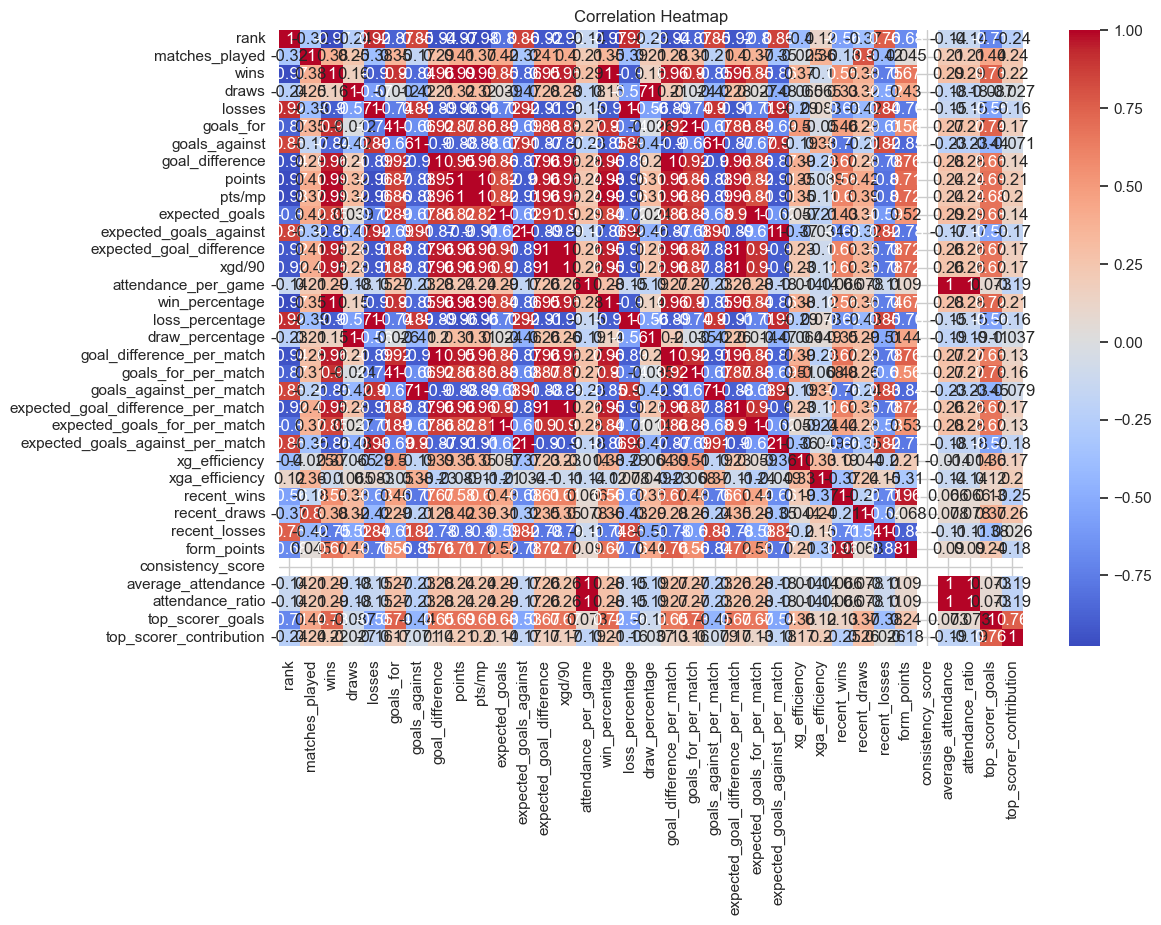

In [79]:
# Plot a heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

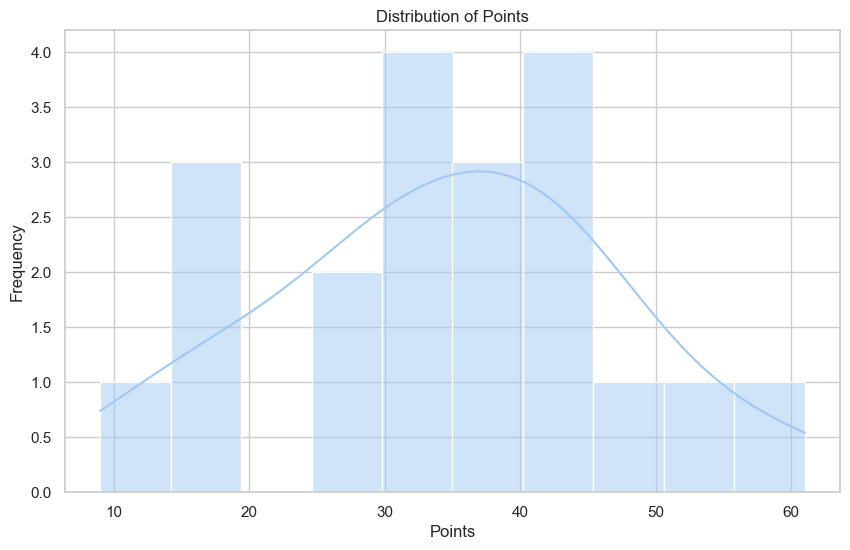

In [80]:
# Plot the distribution of points
plt.figure(figsize=(10, 6))
sns.histplot(df['points'], kde=True, bins=10)
plt.title('Distribution of Points')
plt.xlabel('Points')
plt.ylabel('Frequency')
plt.show()

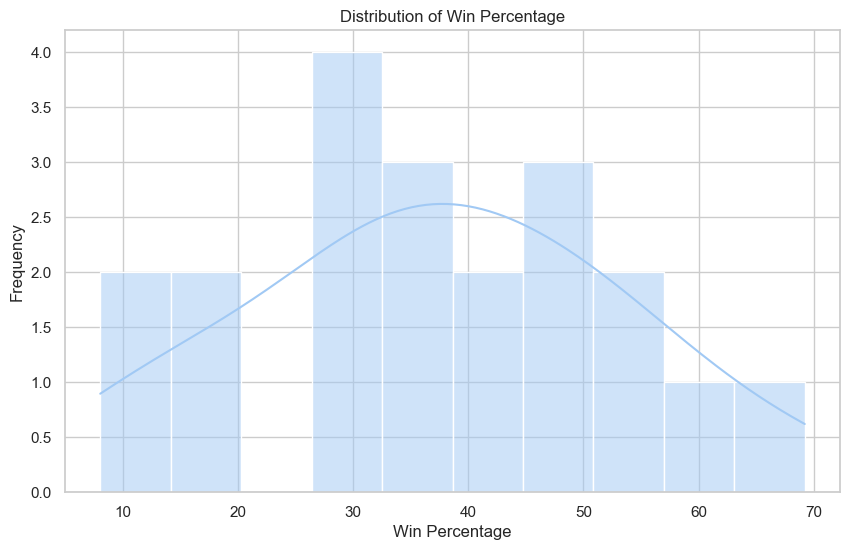

In [81]:
# Plot the distribution of win percentage
plt.figure(figsize=(10, 6))
sns.histplot(df['win_percentage'], kde=True, bins=10)
plt.title('Distribution of Win Percentage')
plt.xlabel('Win Percentage')
plt.ylabel('Frequency')
plt.show()

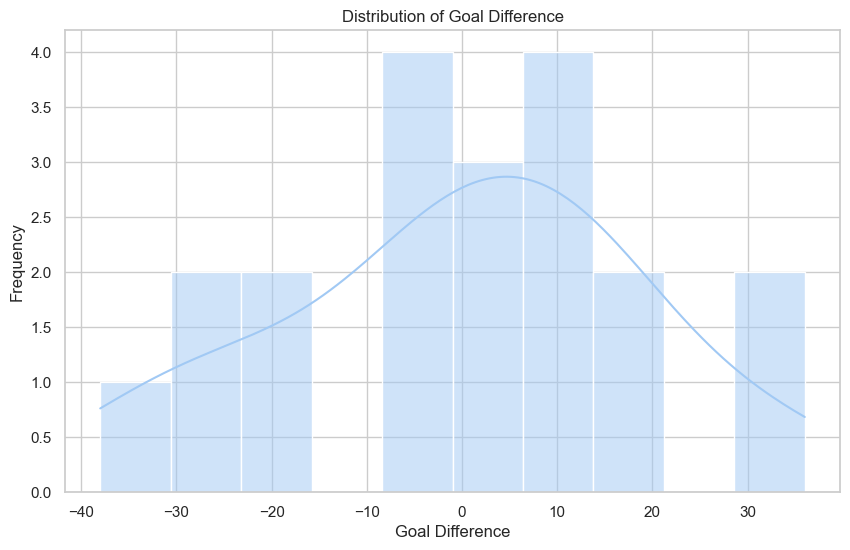

In [82]:
# Plot the distribution of goal difference
plt.figure(figsize=(10, 6))
sns.histplot(df['goal_difference'], kde=True, bins=10)
plt.title('Distribution of Goal Difference')
plt.xlabel('Goal Difference')
plt.ylabel('Frequency')
plt.show()

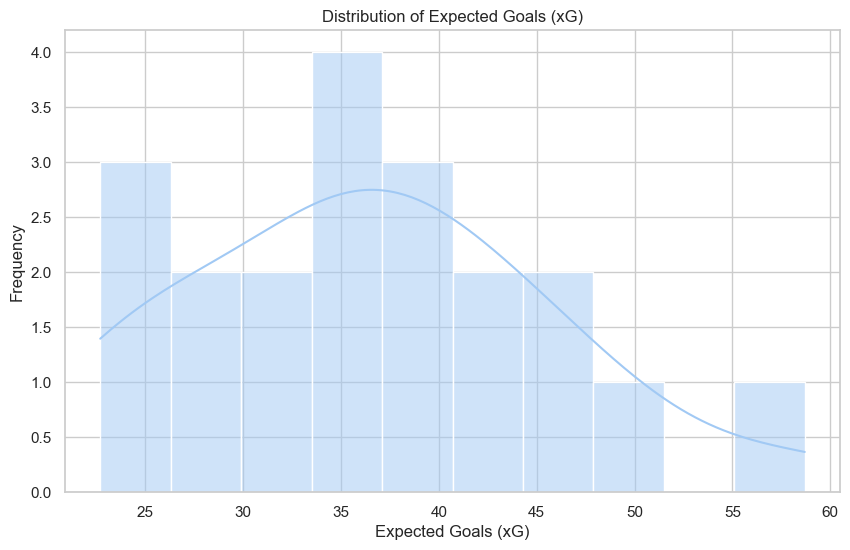

In [83]:
# Plot the distribution of expected goals
plt.figure(figsize=(10, 6))
sns.histplot(df['expected_goals'], kde=True, bins=10)
plt.title('Distribution of Expected Goals (xG)')
plt.xlabel('Expected Goals (xG)')
plt.ylabel('Frequency')
plt.show()

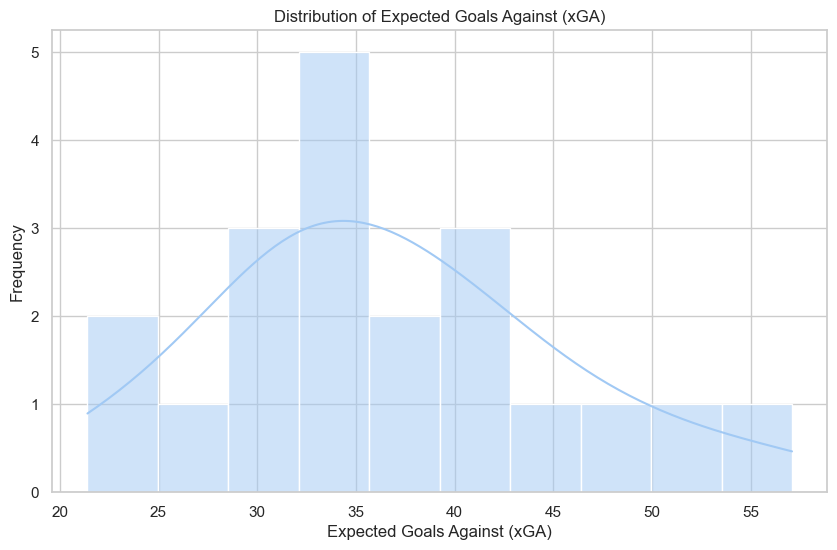

In [84]:
# Plot the distribution of expected goals against
plt.figure(figsize=(10, 6))
sns.histplot(df['expected_goals_against'], kde=True, bins=10)
plt.title('Distribution of Expected Goals Against (xGA)')
plt.xlabel('Expected Goals Against (xGA)')
plt.ylabel('Frequency')
plt.show()

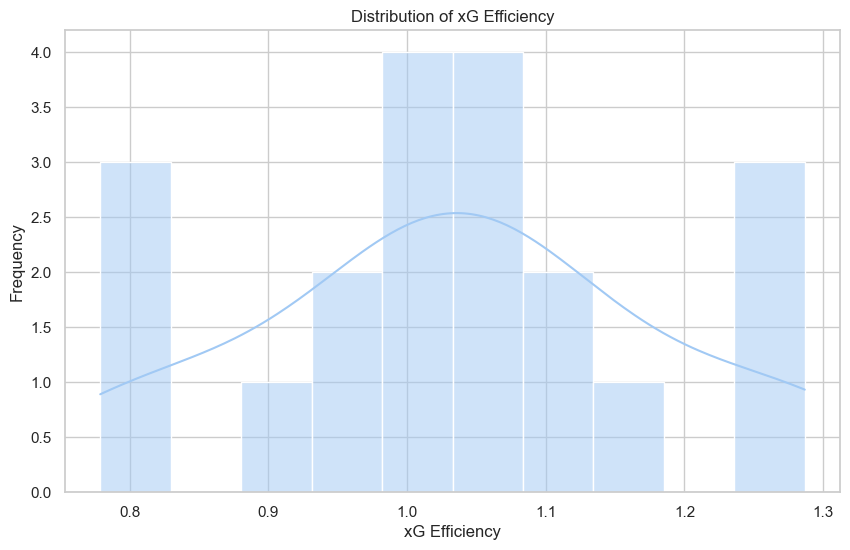

In [85]:
# Plot the distribution of xG efficiency
plt.figure(figsize=(10, 6))
sns.histplot(df['xg_efficiency'], kde=True, bins=10)
plt.title('Distribution of xG Efficiency')
plt.xlabel('xG Efficiency')
plt.ylabel('Frequency')
plt.show()

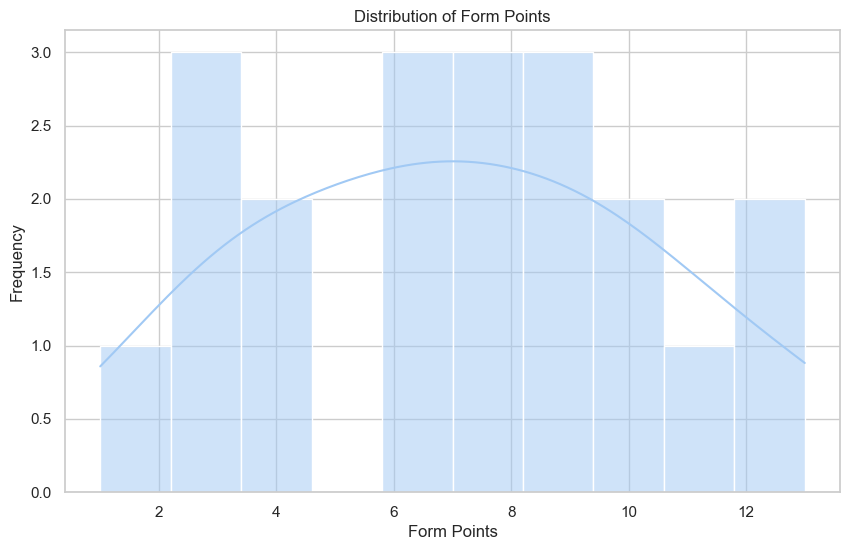

In [86]:
# Plot the distribution of form points
plt.figure(figsize=(10, 6))
sns.histplot(df['form_points'], kde=True, bins=10)
plt.title('Distribution of Form Points')
plt.xlabel('Form Points')
plt.ylabel('Frequency')
plt.show()

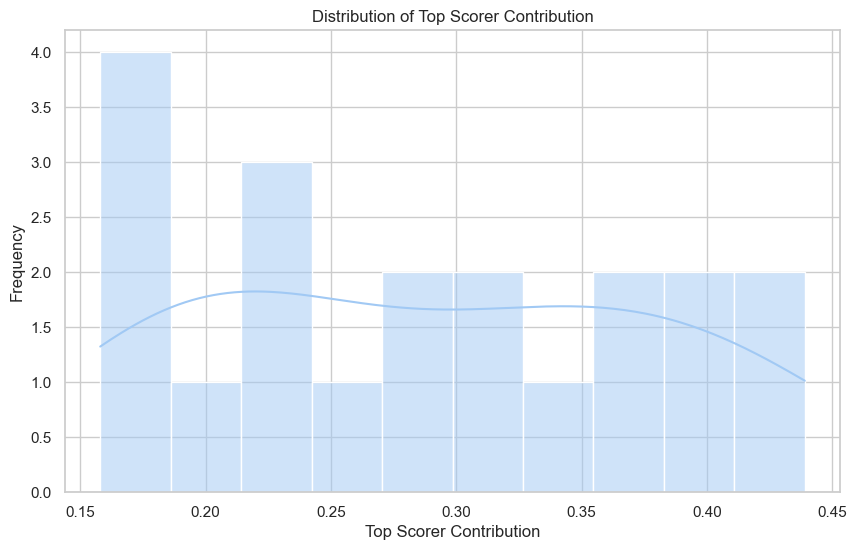

In [87]:
# Plot the distribution of top scorer contribution
plt.figure(figsize=(10, 6))
sns.histplot(df['top_scorer_contribution'], kde=True, bins=10)
plt.title('Distribution of Top Scorer Contribution')
plt.xlabel('Top Scorer Contribution')
plt.ylabel('Frequency')
plt.show()

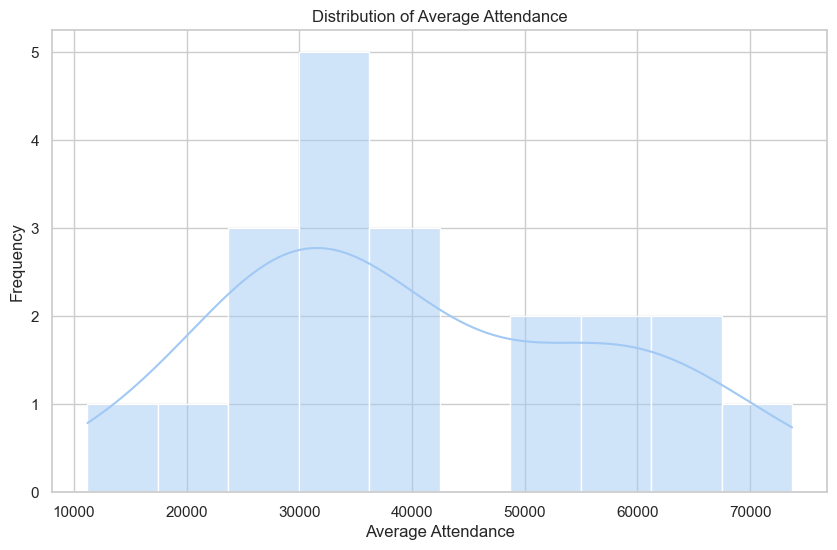

In [88]:
# Plot the distribution of average attendance
plt.figure(figsize=(10, 6))
sns.histplot(df['average_attendance'], kde=True, bins=10)
plt.title('Distribution of Average Attendance')
plt.xlabel('Average Attendance')
plt.ylabel('Frequency')
plt.show()

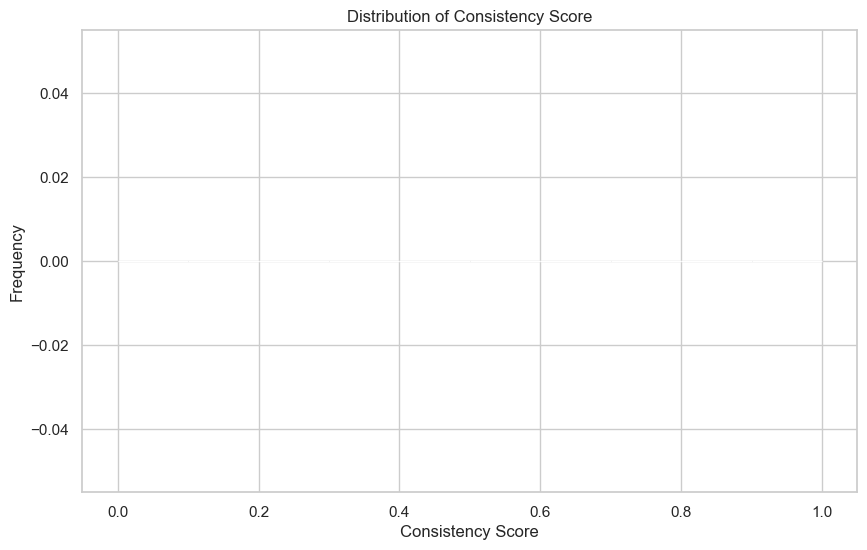

In [89]:
# Plot the distribution of consistency score
plt.figure(figsize=(10, 6))
sns.histplot(df['consistency_score'], kde=True, bins=10)
plt.title('Distribution of Consistency Score')
plt.xlabel('Consistency Score')
plt.ylabel('Frequency')
plt.show()

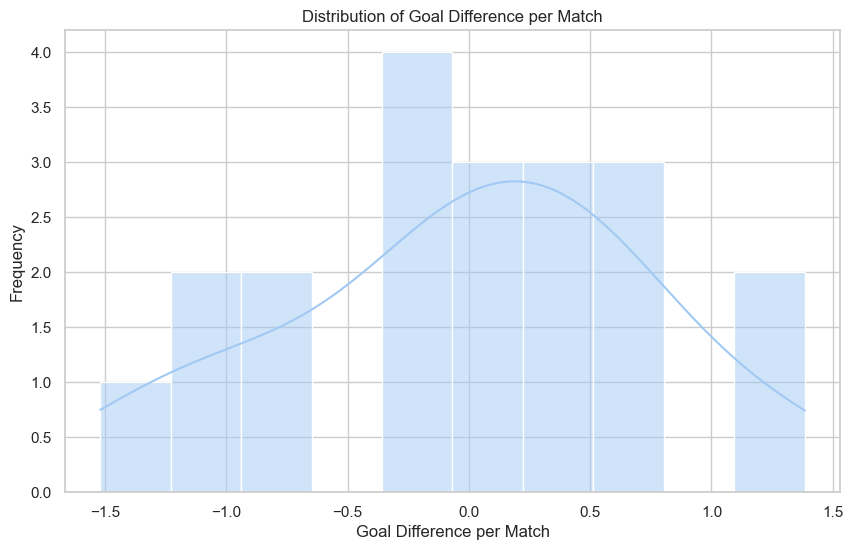

In [90]:
# Plot the distribution of goal difference per match
plt.figure(figsize=(10, 6))
sns.histplot(df['goal_difference_per_match'], kde=True, bins=10)
plt.title('Distribution of Goal Difference per Match')
plt.xlabel('Goal Difference per Match')
plt.ylabel('Frequency')
plt.show()

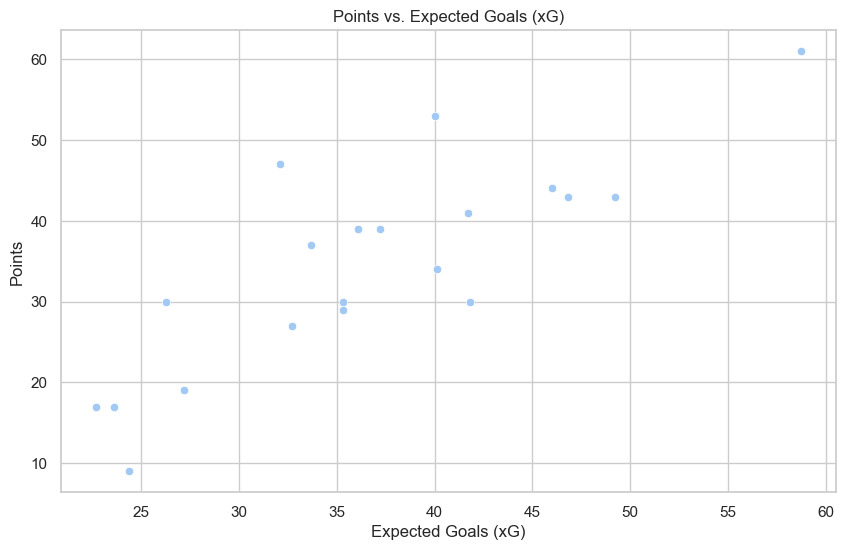

In [91]:
# Plot points vs. expected goals
plt.figure(figsize=(10, 6))
sns.scatterplot(x='expected_goals', y='points', data=df)
plt.title('Points vs. Expected Goals (xG)')
plt.xlabel('Expected Goals (xG)')
plt.ylabel('Points')
plt.show()

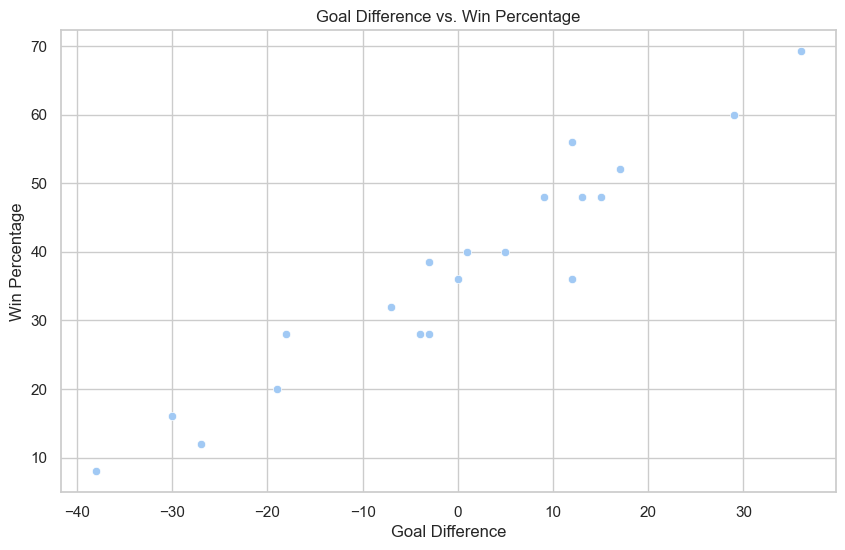

In [92]:
# Plot goal difference vs. win percentage
plt.figure(figsize=(10, 6))
sns.scatterplot(x='goal_difference', y='win_percentage', data=df)
plt.title('Goal Difference vs. Win Percentage')
plt.xlabel('Goal Difference')
plt.ylabel('Win Percentage')
plt.show()